# 1. Introduction

<b> Name: </b> Mohammad Javad Sharififar

<b> E-Mail: </b> Sharifi700@gmail.com

<b> Discription: </b> Thsi code is a model which trained on <i> BADS_WS2021_known.csv </i> from <i> https://www.kaggle.com/c/bads2021/data </i> Here we want to predict if customors return goods or not</i>

# 2. Set the Notebook

In [293]:
#importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [294]:
#import data
data_or = pd.read_csv("https://raw.githubusercontent.com/TaTo0101/bads/master/kaggle/data/BADS_WS2021_known.csv",
                   index_col='order_item_id')

In [363]:
data = data_or.copy() #we work on data to not lose original data in case of needings

# 3. Exploratery Data Analysis

In [364]:
data

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
order_item_id,,,,,,,,,,,,,
1,2016-06-22,2016-06-27,643,38,navy,30,49.90,30822,Mrs,1969-04-17,Saxony,2016-06-23,0
2,2016-06-22,NaN,337,152,grey,30,19.95,30822,Mrs,1969-04-17,Saxony,2016-06-23,0
3,2016-06-22,2016-06-27,270,xxl,grey,49,79.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1
4,2016-06-22,2016-06-27,142,xxl,grey,49,99.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,0
5,2016-06-22,2016-06-27,561,xxl,grey,3,14.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,2016-09-11,2016-09-12,156,20,blue,34,29.90,713,Mrs,1959-03-21,Rhineland-Palatinate,2015-02-17,0
99997,2016-09-11,2016-09-12,156,20,brown,34,29.90,713,Mrs,1959-03-21,Rhineland-Palatinate,2015-02-17,0
99998,2016-09-11,1994-12-31,1832,xxl,black,37,26.90,47794,Mr,1985-03-01,Hamburg,2016-09-10,0


Its obvious that we want o predict if the item is returend by customer or not and target variable is <i> return </i>

In [365]:
data.describe()

,item_id,brand_id,item_price,user_id,return
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,923.781820,30.149020,65.064695,27169.073960,0.458180
std,702.568822,28.180191,47.991546,14053.417669,0.498251
min,1.000000,1.000000,0.000000,9.000000,0.000000
25%,214.000000,5.000000,29.900000,14937.000000,0.000000
50%,812.000000,25.000000,49.900000,31189.000000,0.000000
75%,1581.000000,44.000000,79.900000,38917.250000,1.000000
max,2241.000000,138.000000,999.000000,48241.000000,1.000000


<b> Note:  </b> as wee see return mean is  0.45, so our model should have an accuracy more than 0.55 to perform better than a Dummy Classifier

In [366]:
data.info() #to see dtype and num of missing values in dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1 to 100000
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_date     100000 non-null  object 
 1   delivery_date  90682 non-null   object 
 2   item_id        100000 non-null  int64  
 3   item_size      100000 non-null  object 
 4   item_color     100000 non-null  object 
 5   brand_id       100000 non-null  int64  
 6   item_price     100000 non-null  float64
 7   user_id        100000 non-null  int64  
 8   user_title     100000 non-null  object 
 9   user_dob       91275 non-null   object 
 10  user_state     100000 non-null  object 
 11  user_reg_date  100000 non-null  object 
 12  return         100000 non-null  int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 10.7+ MB


As shown above, we have 4 date data that have stored as object, we should change them to date to use them. 
Also return value should change to bool because it is a binary target variable

We will handle other variables in Preprocessing section

In [367]:
time_date = ['order_date','delivery_date','user_dob','user_reg_date']
for i in time_date:
    data[i] = pd.to_datetime(data[i],format = '%Y-%m-%d',errors = 'coerce') #coerce means NaN if converting was unseccessful
    
data["return"] = data["return"].astype(bool)

In [368]:
data.info()
#Check if converting was seccessful

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1 to 100000
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   order_date     100000 non-null  datetime64[ns]
 1   delivery_date  90682 non-null   datetime64[ns]
 2   item_id        100000 non-null  int64         
 3   item_size      100000 non-null  object        
 4   item_color     100000 non-null  object        
 5   brand_id       100000 non-null  int64         
 6   item_price     100000 non-null  float64       
 7   user_id        100000 non-null  int64         
 8   user_title     100000 non-null  object        
 9   user_dob       91275 non-null   datetime64[ns]
 10  user_state     100000 non-null  object        
 11  user_reg_date  100000 non-null  datetime64[ns]
 12  return         100000 non-null  bool          
dtypes: bool(1), datetime64[ns](4), float64(1), int64(3), object(4)
memory usage: 10.0+ MB


Spite of Seccessful Conversion, we know that its impossible to use this type of feature in this problem. So we generate some features according to these dates and drop the dates.

In [369]:
data['delivery_range'] = (data['delivery_date']-data['order_date']).dt.days #how many days does it took to deliever the item?
data['age'] = (data['order_date']-data['user_dob']).dt.days/365 #the age of user in the order time
data['reg_to_order'] = (data['order_date']-data['user_reg_date']).dt.days  #how many days after registration  user ordered the item?

data.drop(time_date,axis = 1,inplace = True) #droping date feature

Now we have 4 numeric variable: delievery range, age, reg to order and item price. here we draw box plot of each grouped by return to find: 

* the range of each one,
* if they have outlier or incorrect value, 
* if range of theyr value grouped by return significantly differ

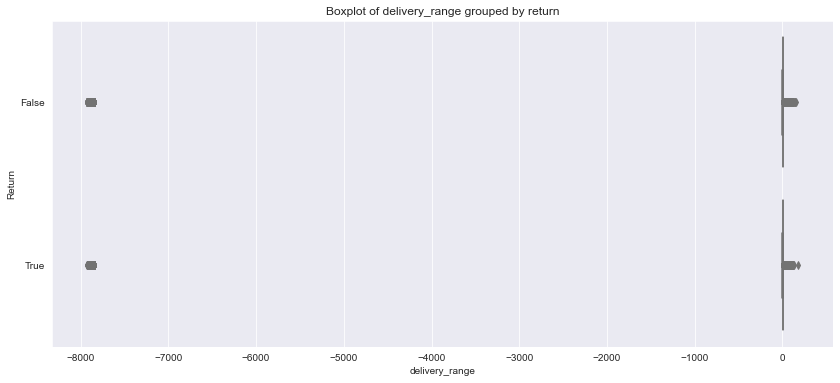

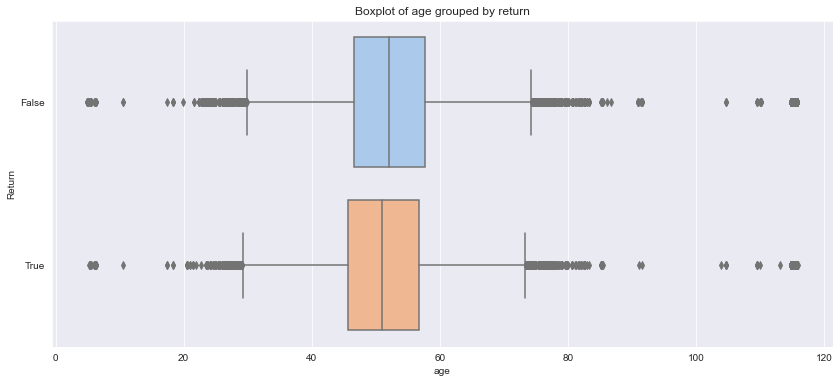

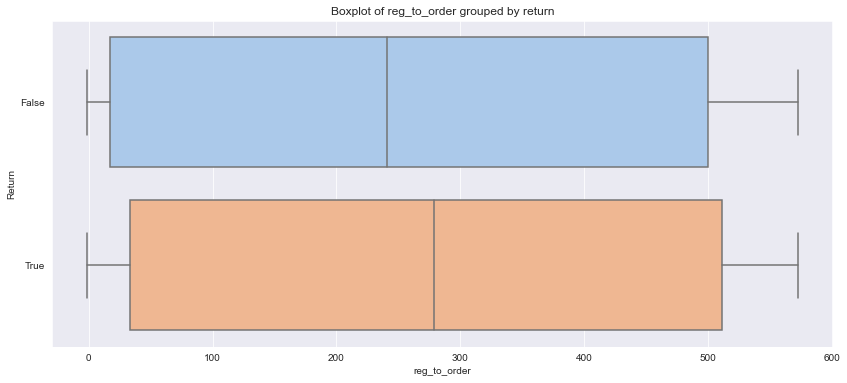

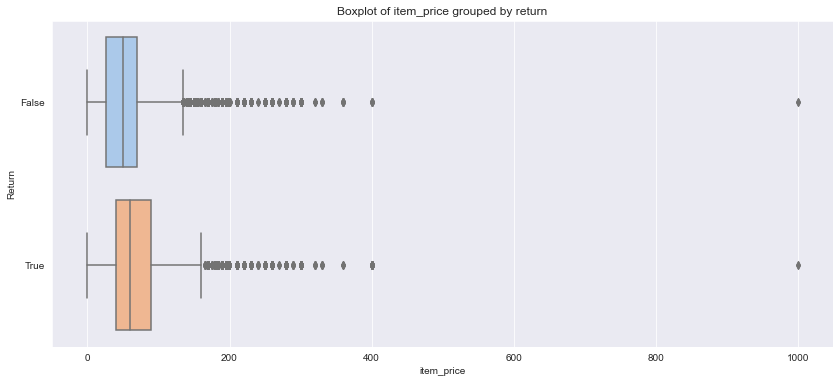

In [370]:
num_data = ['delivery_range','age','reg_to_order','item_price'] 

#Defining a function to plotting
def boxplot_return(v2):
    plot_num = data.loc[:, ["return",v2]]
    plt.figure(figsize= (14,6))
    plot = sns.boxplot(data = plot_num, x = v2, y = "return", orient = "h")
    plot.set(xlabel = i , ylabel = "Return", title = "Boxplot of {} grouped by return".format(i))
    plt.show()
    
sns.set_style("darkgrid")
sns.set_palette("pastel")

for i in num_data:
    boxplot_return(i)

Here we see that in delievery range, age and reg to order we have incorrect data, like age older than 100 or negetaive dilievery range.
Also we have outliers in all numeic variables except reg_to_ordr that should be handled. 

Now we go deep in categorical variables. First we get the num of unique values of each o see if we can perform One-Hot on them

In [371]:
unique = {}
cat_data = ['item_id','item_size','item_color','brand_id','user_id','user_title','user_state']
for i in cat_data:
    unique[i] = len(data[i].unique())
print(unique)

{'item_id': 1943, 'item_size': 102, 'item_color': 77, 'brand_id': 135, 'user_id': 19205, 'user_title': 5, 'user_state': 16}


So its obvious that we can just perform One-Hot on user_state and user-title, because they have a few unique values. lets see the frequency ot their values and find if we have duplicate (like mr. and Mr) or incorrect value in theses varianbles

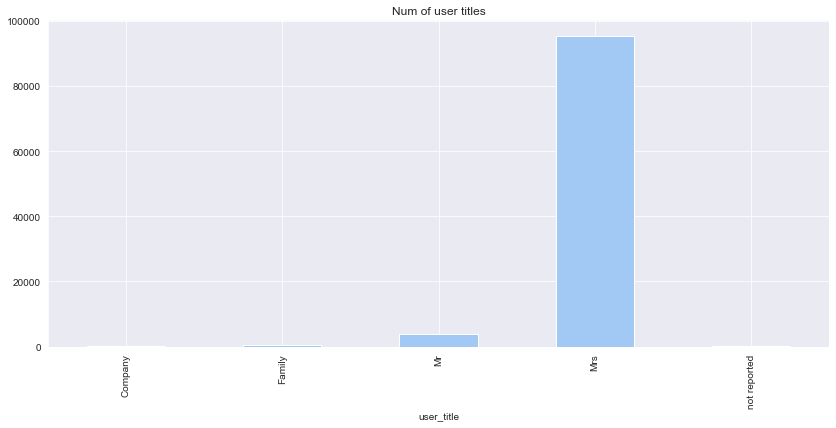

In [372]:
a = data.groupby('user_title')['user_title'].count()
plt.figure(figsize= (14,6))
a.plot.bar(title = 'Num of user titles');

We see there is no mistake in this vriable, and we can get that women ordered much more than men. Noe we see user_state:

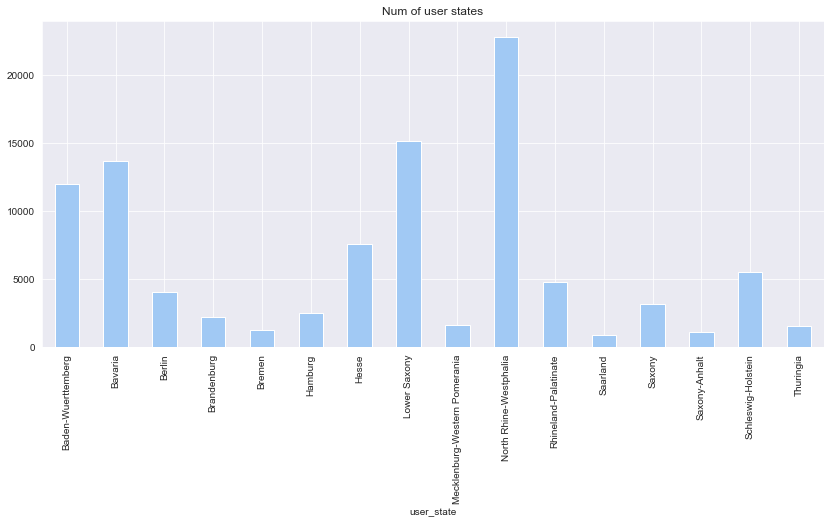

In [373]:
a = data.groupby('user_state')['user_state'].count()
plt.figure(figsize= (14,6))
a.plot.bar(title = 'Num of user states');

Also there is no mistake in this variable. now we are going to have a look on other categorical variables. becase they have many unique values, we cant plot them here. so first we have instant look on their unique values if there is any duplication or incorrection, and then we see the most and the least frequent values of each variable to have attitude on these variables

In [374]:
cat_data = ['item_id','item_size','item_color','brand_id','user_id']

for i in cat_data:
    data[i] = data[i].apply(lambda x: str(x).lower()) #lowering for prevenring duplication
    
for i in cat_data:
    print('{}:'.format(i), data[i].unique(),'\n')

item_id: ['643' '337' '270' ... '787' '2240' '2241'] 

item_size: ['38' '152' 'xxl' '41' '50' 'l' '48' 'xl' '42' '43' '9' '8+' 'unsized' 'm'
 's' '40' '40+' '6+' '10' '8' '7' '44' '37' '39' '36' '4+' '21' '18' '7+'
 '20' '5+' '46' '6' '19' '4' '5' '35' '31' '38+' '29' '34' '3' '30' '45'
 '22' '24' '41+' '39+' '23' '140' '116' '26' '9+' '3632' '4032' '10+' '1'
 '36+' '11' '28' '11+' '12' '25' '37+' '128' '176' 'xs' '42+' '3432' '164'
 '52' '104' '33' '32' '14' 'xxxl' '27' '13' '56' '3+' '47' '54' '3332'
 '46+' '2' '80' '45+' '90' '3832' '3634' '44+' '49' '43+' '2+' '100'
 '3132' '58' '4034' '84' '105' '3834' '12+'] 

item_color: ['navy' 'grey' 'white' 'blue' 'black' 'mocca' 'brown' 'red' 'purple'
 'stained' 'turquoise' 'magenta' 'green' 'olive' 'bordeaux' 'petrol'
 'ecru' 'pink' 'denim' 'ocher' 'berry' 'champagner' 'beige' 'ash' 'nature'
 'aubergine' 'aquamarine' 'khaki' 'curry' 'darkblue' 'pallid' 'orange'
 'anthracite' 'azure' 'yellow' 'silver' 'brwon' 'blau' 'dark denim'
 'mango' 'hi

Here we see that there is no mistake in these variables. below we set a dataseries of 5 most and least frequensies in these variables

In [375]:
for i in cat_data:
    a = data.groupby(i)[i].count().sort_values()
    print(a,'\n')

item_id
2232       1
365        1
1194       1
1454       1
360        1
        ... 
100      699
1401     712
22       815
1532     993
1415    1046
Name: item_id, Length: 1943, dtype: int64 

item_size
49          1
4034        1
3634        1
105         1
84          1
        ...  
40       7693
xxl      8966
m       10190
xl      10979
l       12347
Name: item_size, Length: 102, dtype: int64 

item_color
opal               2
avocado            4
creme              4
amethyst           5
copper coin        7
               ...  
red             7264
grey            8708
brown           8734
blue           10625
black          18640
Name: item_color, Length: 77, dtype: int64 

brand_id
109        1
135        1
100        1
115        1
129        1
       ...  
11      4236
37      4716
5       5039
1       8381
3      11389
Name: brand_id, Length: 135, dtype: int64 

user_id
36123      1
38784      1
23435      1
23425      1
23424      1
        ... 
31185     87
36824     88
9

So after EDA, we got an attitude about data and we go for preprocessing:

# 3. Preprocessing

## 3.1. Handling Incorrect Data

In the previous section we saw we have in correct data in 3 variables, we know for delivery_range and reg_to_order the proble, was negetive number, but for age we have ages like under 10 or older 100,to find the good thresh for incorrect age, lets have a look on informal ages

In [376]:
print(np.sort(data.age[np.logical_or(data['age']>80,data['age']<20)].unique()))

[  4.94794521   5.06575342   5.25753425   5.43013699   5.43287671
   5.45205479   5.54794521   5.57808219   5.92054795   6.2109589
   6.23013699   6.30136986  10.51232877  17.4109589   18.36986301
  19.87123288  80.24657534  80.65753425  80.79452055  81.11506849
  81.27123288  81.61917808  81.66849315  81.6739726   81.84109589
  81.84657534  81.85479452  81.8630137   82.          82.03835616
  82.0630137   82.11506849  82.18630137  82.23835616  82.4739726
  82.55342466  82.57260274  82.58630137  82.6109589   82.61369863
  82.61917808  82.70410959  82.72328767  82.93972603  83.26849315
  83.27671233  83.31780822  85.20273973  85.24657534  85.28767123
  85.33150685  85.33424658  85.35616438  85.5260274   86.09863014
  86.68493151  90.95890411  90.96438356  91.02191781  91.05753425
  91.39452055  91.46027397  91.52328767  91.53150685  91.54520548
 103.95342466 104.66849315 104.67123288 104.69041096 109.61369863
 109.97534247 110.16164384 110.19178082 113.21643836 114.80273973
 114.8164383

upthere we see we have many ages older than 100 and a few younger than 20, i guess for young ages, 17 is a good thresh and for old ages 90 is a good thresh, so here we conver these ages and other incorrect variables to NaN

In [377]:
data['delivery_range'] = np.where(data['delivery_range']<0,np.nan,data['delivery_range'])
data['age'] = np.where(np.logical_or(data['age']>90,data['age']<17) ,np.nan,data['age']) #NaN for age>90 or age<17
data['reg_to_order'] = np.where(data['reg_to_order']<0,np.nan,data['reg_to_order'])

## 3.2. Imputing Missing Values

Lets have a look to see how many NaN we have

In [380]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1 to 100000
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   item_id         100000 non-null  object 
 1   item_size       100000 non-null  object 
 2   item_color      100000 non-null  object 
 3   brand_id        100000 non-null  object 
 4   item_price      100000 non-null  float64
 5   user_id         100000 non-null  object 
 6   user_title      100000 non-null  object 
 7   user_state      100000 non-null  object 
 8   return          100000 non-null  bool   
 9   delivery_range  100000 non-null  float64
 10  age             100000 non-null  float64
 11  reg_to_order    100000 non-null  float64
dtypes: bool(1), float64(4), object(7)
memory usage: 11.8+ MB


We can see in the data.info() that if i want to remove all rows with null value, i will lose at least 20 percent of my data set.
so here we replace NaN with the mean of feature.

In [379]:
data.delivery_range = data.delivery_range.fillna(data.delivery_range.mean())
data.age = data.age.fillna(data.age.mean())
data.reg_to_order = data.reg_to_order.fillna(data.reg_to_order.mean())

## 3.3. Imputing Outliers

We should impute outliers of integers, and replace them with the mean of variable:

Here, Outlier means a value that is out of range (Q1-1.5IQ,Q3+1.5IQ)

In [381]:
for i in int_data:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQ = Q3-Q1
    data[i] = np.where(np.logical_or(data[i]>(Q3 + 1.5*IQ) ,data[i]< (Q1 - 1.5*IQ)) ,data[i].mean(), data[i])

check if we outliers are removed:

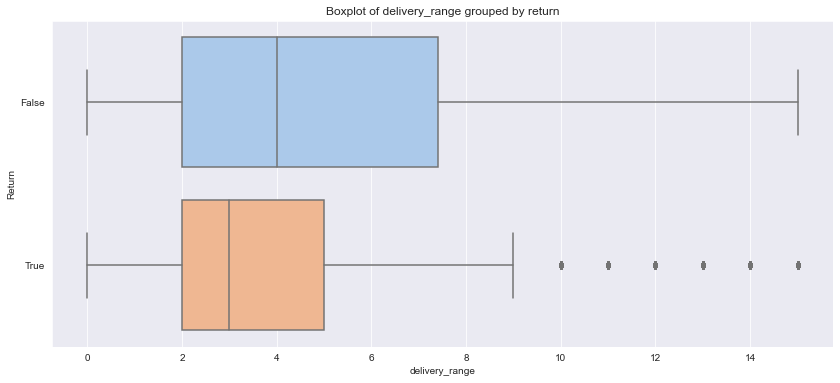

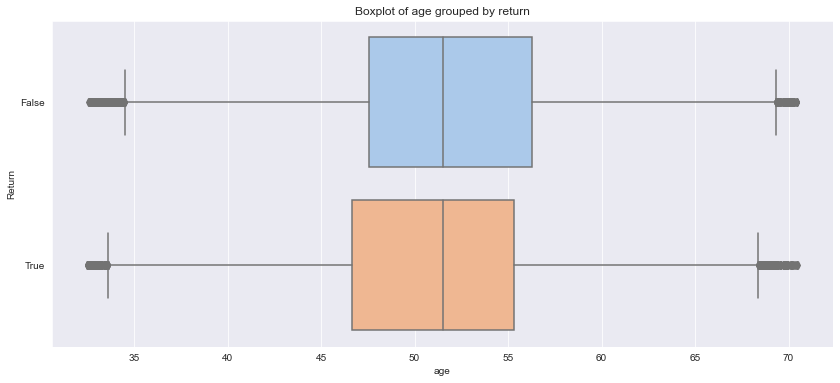

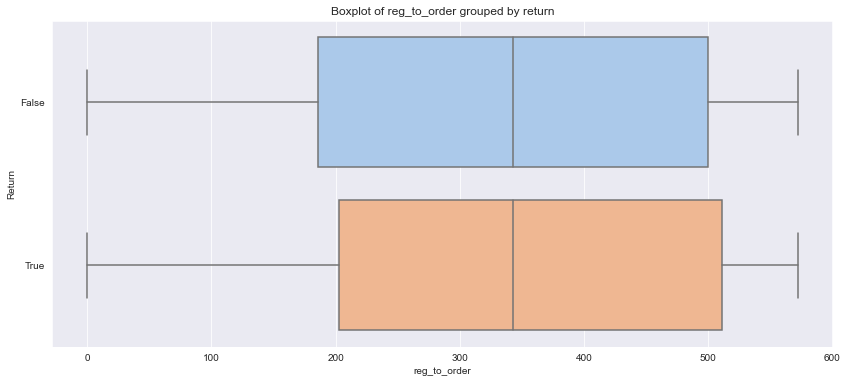

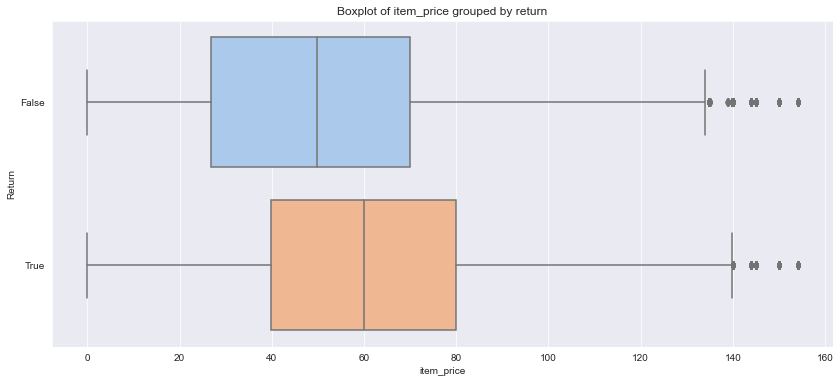

In [390]:
for i in num_data:
    boxplot_return(i)

Outliers seccessfuly removed! (In comparison with above charts)

## 3.4. Rempving Duplicate Values

Duplicate Values do not have any extra information, but they occupay systom processing, so they have to get removed

In [391]:
data.drop_duplicates(inplace = True)

In [392]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98953 entries, 1 to 100000
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         98953 non-null  object 
 1   item_size       98953 non-null  object 
 2   item_color      98953 non-null  object 
 3   brand_id        98953 non-null  object 
 4   item_price      98953 non-null  float64
 5   user_id         98953 non-null  object 
 6   user_title      98953 non-null  object 
 7   user_state      98953 non-null  object 
 8   return          98953 non-null  bool   
 9   delivery_range  98953 non-null  float64
 10  age             98953 non-null  float64
 11  reg_to_order    98953 non-null  float64
dtypes: bool(1), float64(4), object(7)
memory usage: 9.2+ MB


## 3.5. Handling Categorical Data 

We perform One-Hot for categorical features with small number of unique values, inclouding <i> 'user_state' </i> and <i> 'user_title' </i>

In [393]:
data_p = pd.get_dummies(data[['user_state','user_title']])
data_p = pd.concat([data_p,data],axis = 1)
data_p.drop(['user_state','user_title'],axis = 1,inplace = True)
data_p

,user_state_Baden-Wuerttemberg,user_state_Bavaria,user_state_Berlin,user_state_Brandenburg,user_state_Bremen,user_state_Hamburg,user_state_Hesse,user_state_Lower Saxony,user_state_Mecklenburg-Western Pomerania,user_state_North Rhine-Westphalia,...,item_id,item_size,item_color,brand_id,item_price,user_id,return,delivery_range,age,reg_to_order
order_item_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,643,38,navy,30,49.900000,30822,False,5.000000,47.213699,343.208941
2,0,0,0,0,0,0,0,0,0,0,...,337,152,grey,30,19.950000,30822,False,7.401685,47.213699,343.208941
3,1,0,0,0,0,0,0,0,0,0,...,270,xxl,grey,49,79.900000,30823,True,5.000000,46.200000,465.000000
4,1,0,0,0,0,0,0,0,0,0,...,142,xxl,grey,49,99.900000,30823,False,5.000000,46.200000,465.000000
5,1,0,0,0,0,0,0,0,0,0,...,561,xxl,grey,3,14.900000,30823,True,5.000000,46.200000,465.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,0,0,0,0,0,0,0,0,0,...,1600,xl,green,75,65.064695,9580,False,2.000000,58.424658,572.000000
99996,0,0,0,0,0,0,0,0,0,0,...,156,20,blue,34,29.900000,713,False,1.000000,57.517808,572.000000
99997,0,0,0,0,0,0,0,0,0,0,...,156,20,brown,34,29.900000,713,False,1.000000,57.517808,572.000000


But for Other Categorical Data, we replace them with the rate of returning them. we should fit this on Training Set and Transform it to Test set avoiding <b><i> Data Leakage </i></b>

In [412]:
X = data_p #for using train_test split we should devide y, we dont drop "return" in X to calculate return rate in X_train
y = data['return']

In [501]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size = 0.2)

In [502]:
cat_data = ['item_id','brand_id','item_color','item_size','user_id']
a = {}
for i in cat_data:
    X_train['{}_return_rate'.format(i)] = X_train.groupby(i)['return'].transform('mean') #rate instead of every categorical
    a['{}_return_rate'.format(i)] = dict(X_train.groupby(i)['return'].mean()) #a dictionary for mapping to X_test

<ipython-input-502-38fa3ac66d7f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['{}_return_rate'.format(i)] = X_train.groupby(i)['return'].transform('mean') #rate instead of every categorical


In [503]:
for i in cat_data:
    X_test['{}_return_rate'.format(i)] = X_test[i].map(a['{}_return_rate'.format(i)]) #mapping to X_test

<ipython-input-503-e6a6dd39bda1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['{}_return_rate'.format(i)] = X_test[i].map(a['{}_return_rate'.format(i)]) #mapping to X_test


In [504]:
X_train.drop(['item_id','brand_id','item_color','item_size','user_id','return'], axis = 1, inplace = True)
X_test.drop(['item_id','brand_id','item_color','item_size','user_id','return'], axis = 1, inplace = True)
#removing not needed fetures including return in X

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Here we may have null values in test set, so lets impute them:

In [505]:
X_test.isnull().sum()

user_state_Baden-Wuerttemberg                  0
user_state_Bavaria                             0
user_state_Berlin                              0
user_state_Brandenburg                         0
user_state_Bremen                              0
user_state_Hamburg                             0
user_state_Hesse                               0
user_state_Lower Saxony                        0
user_state_Mecklenburg-Western Pomerania       0
user_state_North Rhine-Westphalia              0
user_state_Rhineland-Palatinate                0
user_state_Saarland                            0
user_state_Saxony                              0
user_state_Saxony-Anhalt                       0
user_state_Schleswig-Holstein                  0
user_state_Thuringia                           0
user_title_Company                             0
user_title_Family                              0
user_title_Mr                                  0
user_title_Mrs                                 0
user_title_not repor

In [506]:
for i in ['item_id_return_rate','brand_id_return_rate','item_color_return_rate','item_size_return_rate','user_id_return_rate']:
    X_test[i] = X_test[i].fillna(X_test[i].mean())

<ipython-input-506-3657e7e5333c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[i] = X_test[i].fillna(X_test[i].mean())


## 3.6. Feature Scaling 

Feature Scaling is important for feature selection and extraction, and should be fit in training set and transform to test set. Here we chose <i> Normalization </i> for scaling

In [507]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_n=pd.DataFrame(scaler.fit_transform(X_train),columns = list(X_train.columns))
X_test_n = pd.DataFrame(scaler.transform(X_test), columns = list(X_test.columns))

## 3.7. Feature Engeeniring 

From here on, we have 2 different ways to continue training the model. we can use feature selection or feature exraxction (Dimensionality Reduction.) because of that, I call first way as A (Feature Selection) and second way as B (Feature Extraction) and at last we see wich one gives us better accuracy

<b> Note: </b> I know that feature Engeenierng refers to broad operations like feature generation and feature scaling I already done, but we use here this term for simplicity

### 3.7.A. Fearute Selection 

There are many ways for feature selection, I used chi2 here

In [508]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train_n,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train_n.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                                Specs        Score
29                user_id_return_rate  5991.297886
25                item_id_return_rate   469.210053
21                         item_price   181.745625
22                     delivery_range   144.223857
26               brand_id_return_rate    48.513404
18                      user_title_Mr    18.447264
23                                age    14.450865
16                 user_title_Company    12.808569
9   user_state_North Rhine-Westphalia    10.844379
24                       reg_to_order     9.207433


I guess top 5 result are enough for our prediction, so we select them

In [509]:
X_train_chi2 = X_train_n[(featureScores.nlargest(5,'Score').iloc[:,0])]
X_test_chi2 = X_test_n[(featureScores.nlargest(5,'Score').iloc[:,0])]

# 4. Model Selection

First we import defferent models

In [510]:
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

Here we have to split the training set again, to train and validation set

In [511]:
X_train_chi2,X_val_chi2,y_train_chi2,y_val_chi2 = train_test_split(X_train_chi2,y_train, random_state = 0) 
#test_size parameter is 0.25 by defualt which means validation set is 0.2% of the whole data

Now we test every model using cross validation to find the best performance, accuracy as metric

In [476]:
models = {'SVM': SVC(random_state = 42), 'NaiveBayes': GaussianNB(), 'RandomForest':RandomForestClassifier(random_state = 42),
         'GB': GradientBoostingClassifier(random_state = 42),'KNN':KNeighborsClassifier(),
          'LReg': LogisticRegression(random_state = 42)}

for name, model, in models.items():
    scores = cross_val_score(model,X_train_chi2,y_train_chi2,scoring = 'accuracy', cv=3, n_jobs= -1)
    print(name, ': Mean accuracy: {:.3f} and Standard Deviation: {:.3f}'.format(np.mean(scores), np.std(scores)))

SVM : Mean accuracy: 0.784 and Standard Deviation: 0.003
NaiveBayes : Mean accuracy: 0.774 and Standard Deviation: 0.004
RandomForest : Mean accuracy: 0.753 and Standard Deviation: 0.001
GB : Mean accuracy: 0.787 and Standard Deviation: 0.001
KNN : Mean accuracy: 0.758 and Standard Deviation: 0.002
LReg : Mean accuracy: 0.780 and Standard Deviation: 0.002


So GradiantBoost has the best Accuracy, then we tune the hyperparameters of algorithemes

# 5. Parameter Tuning

To save time, we use RandomizedSearchCV instead of GridSearch

In [495]:
from sklearn.model_selection import RandomizedSearchCV
rand_val_gb = {'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
               'max_depth' : np.linspace(1, 32, 32, endpoint=True),
                   'min_samples_split' : np.linspace(0.1, 1.0, 10, endpoint=True),
                   'min_samples_leaf' : np.linspace(0.1, 0.5, 5, endpoint=True),
                   'max_features' : list(range(1,X_val.shape[1])),
                   'n_estimators' : [1, 2, 4, 8, 16, 32, 64, 100, 200]}

randm_src = RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state = 42),
                               param_distributions = rand_val_gb, cv = 3, n_iter = 32, n_jobs=-1)
randm_src.fit(X_val_chi2,y_val_chi2)

print('gb best values based on accuracy:',randm_src.best_params_ )
print('gb best score based on accuracy:',randm_src.best_score_ )

gb best values based on accuracy: {'n_estimators': 200, 'min_samples_split': 0.5, 'min_samples_leaf': 0.1, 'max_features': 2, 'max_depth': 3.0, 'learning_rate': 0.1}
gb best score based on accuracy: 0.784649588196655


We got the best parameters here and we go for final test

# Model Evaluation

In [522]:
clf = GradientBoostingClassifier(random_state = 42,n_estimators = 200, min_samples_split= 0.5,min_samples_leaf= 0.1,
                                 max_features= 2, max_depth= 3.0, learning_rate= 0.1).fit(X_train_chi2,y_train_chi2)
clf.fit(X_train_chi2,y_train_chi2)
print(clf.score(X_train_chi2,y_train_chi2))
print(clf.score(X_test_chi2,y_test))

0.7848949823988143
0.675711181850336


so here we see the model is still overfit on unseen data. <i> (I dont know how to fix it :( ) </i> and its accuracy is 0.67

In [498]:
from sklearn.metrics import confusion_matrix
gb_prediction = clf.predict(X_test_chi2)
confusion = confusion_matrix(y_test,gb_prediction)
print('confusion matrix of gb classifier: \n',confusion)

confusion matrix of gb classifier: 
 [[7357 3383]
 [3035 6016]]


Confusion matrix tells us we have more FN than FP

In [499]:
from sklearn.metrics import classification_report
print(classification_report(y_test,gb_prediction))

              precision    recall  f1-score   support

       False       0.71      0.69      0.70     10740
        True       0.64      0.66      0.65      9051

    accuracy                           0.68     19791
   macro avg       0.67      0.67      0.67     19791
weighted avg       0.68      0.68      0.68     19791



And here is classification report!

### 3.7.B. Feature Extraction

In this section, instead of feature selection we try feature extraction and use PCA for dimensionality reduction. through efforts i find out n_components = 10 has better performance and we use that here.

In [512]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

In [513]:
X_train_pca = pd.DataFrame(pca.fit_transform(X_train_n),columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
X_test_pca = pd.DataFrame(pca.transform(X_test_n),columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

# 4. Model Selection 

Do same as above

In [514]:
X_train_pca,X_val_pca,y_train_pca,y_val_pca = train_test_split(X_train_pca,y_train, random_state = 0) 

In [515]:
models = {'SVM': SVC(random_state = 42), 'NaiveBayes': GaussianNB(), 'RandomForest':RandomForestClassifier(random_state = 42),
         'GB': GradientBoostingClassifier(random_state = 42),'KNN':KNeighborsClassifier(),
          'LReg': LogisticRegression(random_state = 42)}

for name, model, in models.items():
    scores = cross_val_score(model,X_train_pca,y_train_pca,scoring = 'accuracy', cv=3, n_jobs= -1)
    print(name, ': Mean accuracy: {:.3f} and Standard Deviation: {:.3f}'.format(np.mean(scores), np.std(scores)))

SVM : Mean accuracy: 0.771 and Standard Deviation: 0.002
NaiveBayes : Mean accuracy: 0.761 and Standard Deviation: 0.002
RandomForest : Mean accuracy: 0.748 and Standard Deviation: 0.001
GB : Mean accuracy: 0.769 and Standard Deviation: 0.003
KNN : Mean accuracy: 0.735 and Standard Deviation: 0.002
LReg : Mean accuracy: 0.769 and Standard Deviation: 0.002


# 5. Parameter tuning

In [520]:
from sklearn.model_selection import RandomizedSearchCV

rand_val_svm = {'gamma':[0.1,1,10,100],'C': [0.01,0.1,1,10],'kernel': ['rbf','linear','poly'],'degree' :[0, 1, 2, 3, 4, 5, 6]}

randm_src = RandomizedSearchCV(estimator=SVC(random_state = 42),
                               param_distributions = rand_val_svm, cv = 3, n_iter = 3, n_jobs=-1)
randm_src.fit(X_val_pca,y_val_pca)

print('svm best values based on accuracy:',randm_src.best_params_ )
print('svm best score based on accuracy:',randm_src.best_score_ )

svm best values based on accuracy: {'kernel': 'rbf', 'gamma': 0.1, 'degree': 2, 'C': 10}
svm best score based on accuracy: 0.7707038552877571


we got best hyperparameters for svm and we go for final test.

# 6. Model evaluation

In [523]:
svm = SVC(kernel = "rbf", gamma= 0.1, degree = 2, C= 10,random_state = 42)

svm.fit(X_train_pca,y_train_pca)
print(svm.score(X_train_pca,y_train_pca))
print(svm.score(X_test_pca,y_test))

0.7700055582691887
0.6556010307715628


In [526]:
svm_prediction = svm.predict(X_test_pca)
confusion = confusion_matrix(y_test,svm_prediction)
print('confusion matrix of svm classifier: \n',confusion)

confusion matrix of svm classifier: 
 [[6844 3896]
 [2920 6131]]


Its obvious that we have less FP in this way but more FN (in comparison with feature selection)

In [527]:
print(classification_report(y_test,svm_prediction))

              precision    recall  f1-score   support

       False       0.70      0.64      0.67     10740
        True       0.61      0.68      0.64      9051

    accuracy                           0.66     19791
   macro avg       0.66      0.66      0.66     19791
weighted avg       0.66      0.66      0.66     19791



<b> Final Note: </b> As you see I tried different ways and best accuray I got is 66%. But another time, I trained the model and didnt prevent <b> Data Leakage </b> in converting <i> categorical variables </i> to <i> return rate </i> and there I got accuracy around 0.78% ! so I will be glad if you can inform me about what i can do to improve model metrics! Tnx